<center><h1>Student Alcohol Consumption</h1></center>
<center><h2><i>~ Exploratory Data Analysis ~</i></h2></center>
<center><img src="https://authoritynutrition.com/wp-content/uploads/2014/12/bottles-of-alcohol.jpg"></center>

<h2>Origin of the data</h2>
<p>
The link below contains a description of the dataset, a download link to it and, lastly, a link to a reserach paper that utilizes the dataset for clasification purposes:
https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION
</p>

<h2>Loading, previewing and summarizing the data</h2>

In [1]:
import pandas as pd # For data clearning and manipulation
pd.set_option('display.max_columns', 500) # Ensures all features / dataframe columns are printed

import matplotlib.pyplot as plt # For plotting purporses
# Ensures the plots will be embedded into the notebook
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from bokeh.charts import Bar    # For plotting purporses
from bokeh.plotting import output_notebook, show
from bokeh.charts.attributes import cat, color
output_notebook()

from sklearn.decomposition import PCA

Loading BokehJS ...

In [2]:
# Read dataset and 
data_frame = pd.read_csv(filepath_or_buffer="./student-mat.csv", sep=";")
rows = data_frame.shape[0]
cols = data_frame.shape[1]
print 'The shape of the data is %d rows and %d columns' % (rows, cols)

The shape of the data is 395 rows and 33 columns


In [3]:
# Preview data
data_frame.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [4]:
# Summarize data
summary = data_frame.describe()
summary

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

<h2>Analyzing standard deviations of each feature</h2>

In [5]:
data_stds = pd.Series.to_frame(summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=True)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [6]:
data_stds.T

traveltime  failures  studytime      Dalc    famrel  freetime      Fedu  \
std    0.697505  0.743651    0.83924  0.890741  0.896659  0.998862  1.088201   

         Medu     goout       age      Walc    health        G1        G2  \
std  1.094735  1.113278  1.276043  1.287897  1.390303  3.319195  3.761505   

           G3  absences  
std  4.581443  8.003096


The summarized data shows that the greatest variance within features can be found, in order, in the following
features:
1. G3
2. G2
3. G1
4. Absences
5. health

Surprisngly enough, there doesn't appear to be much variation in the two features that represent alcohol consumption: Dalc and Walc. Let's explore that further later on. It should also be noted that the paper that this dataset is associated with uses a combination of Dalc and Walc as the measure of alcohol consumption instead of using them both separately. Perhaps combining the two features similarly to the paper would show more variation. We'll explore that idea further later on


<h2>Cleaning up the data</h2>

In [7]:
categorical_cols = data_frame.select_dtypes(include=['object']) # Getting all non-numerical columns
print 'There are a total of %d categorical features out of %d total' %(categorical_cols.shape[1], cols)


There are a total of 17 categorical features out of 33 total


In [8]:
data_frame_categorical = pd.get_dummies(data=data_frame) # One hot encoding
data_frame_categorical.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_GP  school_MS  sex_F  \
0     1     1       3         6   5   6   6          1          0      1   
1     1     1       3         4   5   5   6          1          0      1   
2     2     3       3        10   7   8  10          1          0      1   
3     1     1       5         2  15  14  15          1          0      1   
4     1     2       5         4   6  10  10          1          0      1   

   sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
0      0          0          1            1            0          1   
1      0          0          1            1            0          0   
2      0          0          1            0            1          0   
3      0          0          1            1            0          0   
4      0          0          1            1            0          0   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0          0             1            0           0              0   
1          1             1            0           0              0   
2          1             1            0           0              0   
3          1             0            1           0              0   
4          1             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0             0             0            0           0              0   
1             0             0            0           1              0   
2             0             0            0           1              0   
3             0             0            0           0              1   
4             0             0            0           1              0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0             1              1            0             0                  0   
1             0              1            0             0                  0   
2             0              0            0             1                  0   
3             0              0            1             0                  0   
4             0              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  schoolsup_no  \
0                0                1               0             0   
1                1                0               0             1   
2                0                1               0             0   
3                0                1               0             1   
4                1                0               0             1   

   schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  activities_no  \
0              1          1           0        1         0              1   
1              0          0           1        1         0              1   
2              1          1           0        0         1              1   
3              0          0           1        0         1              0   
4              0          0           1        0         1              1   

   activities_yes  nursery_no  nursery_yes  higher_no  higher_yes  \
0               0           0            1          0           1   
1               0           1            0          0           1   
2               0           0            1          0           1   
3               1           0            1          0           1   
4               0           0            1          0           1   

   i

In [9]:
print 'There are a total of %d features out of the original %d ' %(data_frame_categorical.shape[1], cols)


There are a total of 59 features out of the original 33 


In [10]:
non_binary_cols = [ column for column in data_frame_categorical if '_no' not in column ]
data_frame_categorical = data_frame_categorical[non_binary_cols] #Dropping the 'complement' of binary cols
data_frame_categorical.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_GP  school_MS  sex_F  \
0     1     1       3         6   5   6   6          1          0      1   
1     1     1       3         4   5   5   6          1          0      1   
2     2     3       3        10   7   8  10          1          0      1   
3     1     1       5         2  15  14  15          1          0      1   
4     1     2       5         4   6  10  10          1          0      1   

   sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
0      0          0          1            1            0          1   
1      0          0          1            1            0          0   
2      0          0          1            0            1          0   
3      0          0          1            1            0          0   
4      0          0          1            1            0          0   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0          0             1            0           0              0   
1          1             1            0           0              0   
2          1             1            0           0              0   
3          1             0            1           0              0   
4          1             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0             0             0            0           0              0   
1             0             0            0           1              0   
2             0             0            0           1              0   
3             0             0            0           0              1   
4             0             0            0           1              0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0             1              1            0             0                  0   
1             0              1            0             0                  0   
2             0              0            0             1                  0   
3             0              0            1             0                  0   
4             0              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  schoolsup_yes  \
0                0                1               0              1   
1                1                0               0              0   
2                0                1               0              1   
3                0                1               0              0   
4                1                0               0              0   

   famsup_yes  paid_yes  activities_yes  nursery_yes  higher_yes  \
0           0         0               0            1           1   
1           1         0               0            0           1   
2           0         1               0            1           1   
3           1         1               1            1           1   
4           1         1               0            1           1   

   internet_yes  romantic_yes  
0             0             0  
1             1             0  
2             1             0  
3             1             1  
4             0             0

In [11]:
print 'There are a total of %d features out of the original %d ' %(data_frame_categorical.shape[1], cols)


There are a total of 51 features out of the original 33 


In [12]:
# Starting data pre-processing
data_frame.select_dtypes(include=['object']) # Getting all non-numerical columns
data_frame_categorical = pd.get_dummies(data=data_frame) # Categorical expansion
data_frame_categorical.head() 

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_GP  school_MS  sex_F  \
0     1     1       3         6   5   6   6          1          0      1   
1     1     1       3         4   5   5   6          1          0      1   
2     2     3       3        10   7   8  10          1          0      1   
3     1     1       5         2  15  14  15          1          0      1   
4     1     2       5         4   6  10  10          1          0      1   

   sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
0      0          0          1            1            0          1   
1      0          0          1            1            0          0   
2      0          0          1            0            1          0   
3      0          0          1            1            0          0   
4      0          0          1            1            0          0   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0          0             1            0           0              0   
1          1             1            0           0              0   
2          1             1            0           0              0   
3          1             0            1           0              0   
4          1             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0             0             0            0           0              0   
1             0             0            0           1              0   
2             0             0            0           1              0   
3             0             0            0           0              1   
4             0             0            0           1              0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0             1              1            0             0                  0   
1             0              1            0             0                  0   
2             0              0            0             1                  0   
3             0              0            1             0                  0   
4             0              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  schoolsup_no  \
0                0                1               0             0   
1                1                0               0             1   
2                0                1               0             0   
3                0                1               0             1   
4                1                0               0             1   

   schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  activities_no  \
0              1          1           0        1         0              1   
1              0          0           1        1         0              1   
2              1          1           0        0         1              1   
3              0          0           1        0         1              0   
4              0          0           1        0         1              1   

   activities_yes  nursery_no  nursery_yes  higher_no  higher_yes  \
0               0           0            1          0           1   
1               0           1            0          0           1   
2               0           0            1          0           1   
3               1           0            1          0           1   
4               0           0            1          0           1   

   i

<h2>Graphically explore the data</h2>

In [13]:
# PCA to project the data to a visualizable number of features
pca = PCA(n_components=3)
x = pca.fit(data_frame_categorical).transform(data_frame_categorical)

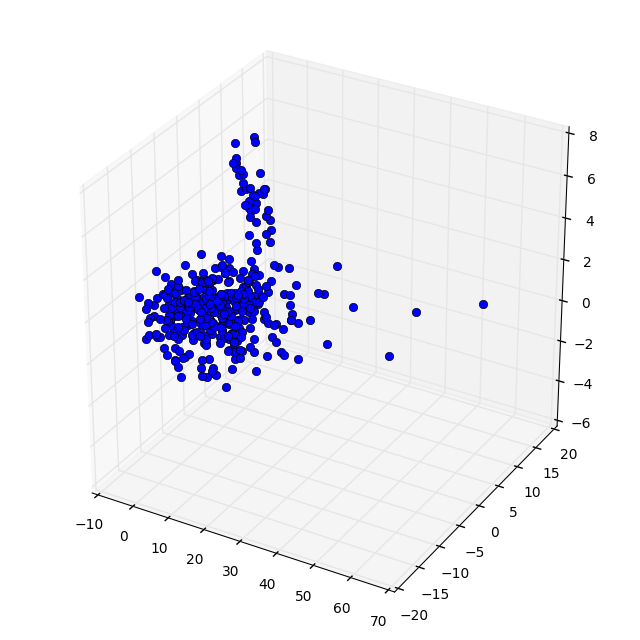

In [14]:
# First plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(x[:,0], x[:,1], x[:,2], 'o')
plt.show()

The data has quite a distinct shape in 3D. Since it doesn't look like a uniform data cloud, that'd be a good indicator of there being an underlying structure to the data that's worth analizing. From the graph ahove, we can distinguish what appear to be 3 distinct clusters of points. We'll see if a KMeans clustering reports the same.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

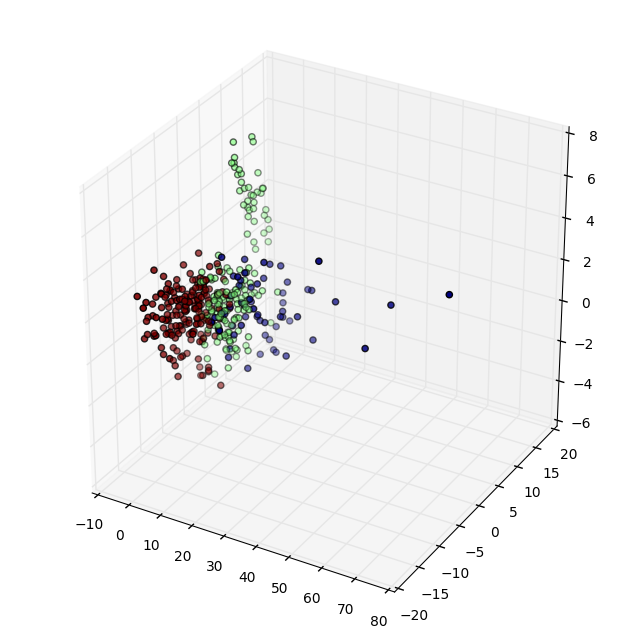

In [16]:
import numpy as np
labels = kmeans.labels_
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], 'o', c=labels.astype(np.float))
plt.show()

Yup, the three clusters seem reasonable as well. Let us confirm that the KMeans clustering is an appropiate one by comparing it to one of a Mixture of Gaussians. Why? Because KMeans can be thought of as a special case of Mixture of Gaussians clustering where the gaussians are concentric circles. 

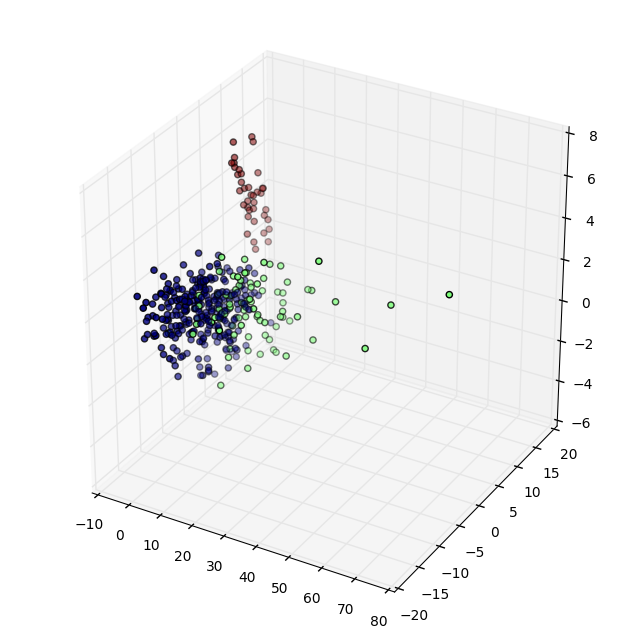

In [17]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3).fit(x)
labels = gmm.predict(x)
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], 'o', c=labels.astype(np.float))
plt.show()

Fairly similar but there's one critical difference, the GMM model finds the blue cluster to be smaller than its corresponding cluster in the previous plot. Since GMM is a more general model, we'll take it's prediction to be more accurate

<h2>A glimpse onto the clusters</h2>
Let us analyze what the clusters that we've found tell us about the data

In [18]:
#Append GMM labels to dataframe
labels_col = pd.DataFrame(data=labels, columns=['GMM_label'])
data_frame_labeled = data_frame_categorical.join(labels_col)

# Split
clusters = data_frame_labeled.groupby('GMM_label')
clusters = [clusters.get_group(z) for z in clusters.groups]

In [19]:
cluster0_summary = clusters[0].describe()
cluster0_summary

age        Medu        Fedu  traveltime   studytime    failures  \
count  273.000000  273.000000  273.000000  273.000000  273.000000  273.000000   
mean    16.494505    2.732601    2.542125    1.454212    2.084249    0.208791   
std      1.216072    1.130265    1.097734    0.706268    0.868277    0.627492   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     15.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     16.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     17.000000    4.000000    3.000000    2.000000    3.000000    0.000000   
max     21.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc       Walc      health  \
count  273.000000  273.000000  273.000000  273.000000  273.00000  273.000000   
mean     4.003663    3.230769    3.047619    1.428571    2.21978    3.575092   
std      0.855339    0.978560    1.047372    0.819920    1.25852    1.407321   
min      1.000000    1.000000    1.000000    1.000000    1.00000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.00000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.00000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.00000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.00000    5.000000   

         absences          G1          G2          G3   school_GP   school_MS  \
count  273.000000  273.000000  273.000000  273.000000  273.000000  273.000000   
mean     3.014652   11.435897   11.681319   11.860806    0.868132    0.131868   
std      2.612147    3.248941    3.084159    3.160365    0.338969    0.338969   
min      0.000000    3.000000    5.000000    5.000000    0.000000    0.000000   
25%      0.000000    9.000000    9.000000   10.000000    1.000000    0.000000   
50%      2.000000   11.000000   12.000000   11.000000    1.000000    0.000000   
75%      4.000000   14.000000   14.000000   14.000000    1.000000    0.000000   
max      9.000000   19.000000   19.000000   20.000000    1.000000    1.000000   

            sex_F       sex_M   address_R   address_U  famsize_GT3  \
count  273.000000  273.000000  273.000000  273.000000   273.000000   
mean     0.505495    0.494505    0.230769    0.769231     0.717949   
std      0.500888    0.500888    0.422099    0.422099     0.450825   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    1.000000     0.000000   
50%      1.000000    0.000000    0.000000    1.000000     1.000000   
75%      1.000000    1.000000    0.000000    1.000000     1.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       famsize_LE3   Pstatus_A   Pstatus_T  Mjob_at_home  Mjob_health  \
count   273.000000  273.000000  273.000000    273.000000   273.000000   
mean      0.282051    0.087912    0.912088      0.146520     0.095238   
std       0.450825    0.283687    0.283687      0.354276     0.294083   
min       0.000000    0.000000    0.000000      0.000000     0.000000   
25%       0.000000    0.000000    1.000000      0.000000     0.000000   
50%       0.000000    0.000000    1.000000      0.000000     0.000000   
75%       1.000000    0.000000    1.000000      0.000000     0.000000   
max       1.000000    1.000000    1.000000      1.000000     1.000000   

       Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
count  273.000000     273.000000    273.000000    273.000000   273.000000   
mean     0.358974       0.245421      0.153846      0.047619     0.047619   
std      0.480581       0.431127      0.361464      0.213350     0.213350   
min      0.000000       0.000000      0.000000      0.000000     0.000000   
25%      0.000000       0.000000      0.000000      0.000000     0.000000   
50%      0.000000       0.000000      0.000000      0.000000     0.000000   
75%  

In [20]:
data_stds = pd.Series.to_frame(cluster0_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [21]:
cluster1_summary = clusters[1].describe()
cluster1_summary

age       Medu       Fedu  traveltime  studytime   failures  \
count  84.000000  84.000000  84.000000   84.000000  84.000000  84.000000   
mean   17.178571   3.000000   2.559524    1.357143   1.904762   0.476190   
std     1.300238   0.944228   1.045371    0.613951   0.687567   0.767976   
min    15.000000   1.000000   1.000000    1.000000   1.000000   0.000000   
25%    16.000000   2.000000   2.000000    1.000000   1.750000   0.000000   
50%    17.000000   3.000000   2.500000    1.000000   2.000000   0.000000   
75%    18.000000   4.000000   3.000000    2.000000   2.000000   1.000000   
max    22.000000   4.000000   4.000000    4.000000   4.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    3.797619   3.297619   3.261905   1.714286   2.690476   3.464286   
std     0.966671   1.117007   1.213568   1.167547   1.353053   1.392289   
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     3.000000   2.750000   2.000000   1.000000   1.000000   3.000000   
50%     4.000000   3.000000   3.000000   1.000000   3.000000   3.000000   
75%     4.000000   4.000000   4.000000   2.000000   4.000000   5.000000   
max     5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   

        absences         G1         G2         G3  school_GP  school_MS  \
count  84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean   17.047619  10.726190  10.309524  10.428571   0.928571   0.071429   
std    10.619265   3.171223   3.139243   3.219989   0.259086   0.259086   
min     9.000000   5.000000   5.000000   4.000000   0.000000   0.000000   
25%    11.750000   8.750000   8.000000   8.000000   1.000000   0.000000   
50%    14.000000  11.000000  10.000000  10.000000   1.000000   0.000000   
75%    18.000000  12.250000  12.000000  13.000000   1.000000   0.000000   
max    75.000000  18.000000  19.000000  19.000000   1.000000   1.000000   

           sex_F      sex_M  address_R  address_U  famsize_GT3  famsize_LE3  \
count  84.000000  84.000000  84.000000  84.000000    84.000000    84.000000   
mean    0.559524   0.440476   0.178571   0.821429     0.642857     0.357143   
std     0.499426   0.499426   0.385293   0.385293     0.482035     0.482035   
min     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
25%     0.000000   0.000000   0.000000   1.000000     0.000000     0.000000   
50%     1.000000   0.000000   0.000000   1.000000     1.000000     0.000000   
75%     1.000000   1.000000   0.000000   1.000000     1.000000     1.000000   
max     1.000000   1.000000   1.000000   1.000000     1.000000     1.000000   

       Pstatus_A  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
count  84.000000  84.000000     84.000000    84.000000   84.000000   
mean    0.178571   0.821429      0.119048     0.071429    0.345238   
std     0.385293   0.385293      0.325790     0.259086    0.478301   
min     0.000000   0.000000      0.000000     0.000000    0.000000   
25%     0.000000   1.000000      0.000000     0.000000    0.000000   
50%     0.000000   1.000000      0.000000     0.000000    0.000000   
75%     0.000000   1.000000      0.000000     0.000000    1.000000   
max     1.000000   1.000000      1.000000     1.000000    1.000000   

       Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
count      84.000000     84.000000     84.000000    84.000000   84.000000   
mean        0.321429      0.142857      0.047619     0.059524    0.607143   
std         0.469830      0.352029      0.214238     0.238024    0.491319   
min         0.000000      0.000000      0.000000     0.000000    0.000000   
25%         0.000000      0.000000      0.000000     0.000000    0.000000   
50%         0.000000      0.000000      0.000000     0.000000    1.000000   
75%         1.000000      0.000000      0.000000     0.000000    1.000000   
max         1.000

In [22]:
data_stds = pd.Series.to_frame(cluster1_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [23]:
cluster2_summary = clusters[2].describe()
cluster2_summary

age       Medu       Fedu  traveltime  studytime   failures  \
count  38.000000  38.000000  38.000000   38.000000  38.000000  38.000000   
mean   17.078947   2.315789   2.289474    1.605263   1.973684   0.921053   
std     1.302421   1.016227   1.112773    0.789782   0.914946   1.075063   
min    15.000000   1.000000   1.000000    1.000000   1.000000   0.000000   
25%    16.000000   2.000000   1.000000    1.000000   1.000000   0.000000   
50%    17.000000   2.000000   2.000000    1.000000   2.000000   1.000000   
75%    18.000000   3.000000   3.000000    2.000000   2.000000   1.750000   
max    19.000000   4.000000   4.000000    4.000000   4.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean    3.842105   3.131579   3.210526   1.342105   1.921053   3.605263   
std     1.000711   0.875216   1.318433   0.534047   1.171314   1.284828   
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     3.000000   3.000000   2.000000   1.000000   1.000000   3.000000   
50%     4.000000   3.000000   3.000000   1.000000   2.000000   4.000000   
75%     4.750000   4.000000   4.000000   2.000000   2.000000   5.000000   
max     5.000000   5.000000   5.000000   3.000000   5.000000   5.000000   

       absences         G1         G2    G3  school_GP  school_MS      sex_F  \
count      38.0  38.000000  38.000000  38.0  38.000000  38.000000  38.000000   
mean        0.0   7.526316   4.657895   0.0   0.894737   0.105263   0.605263   
std         0.0   1.811925   3.700083   0.0   0.311012   0.311012   0.495355   
min         0.0   4.000000   0.000000   0.0   0.000000   0.000000   0.000000   
25%         0.0   6.000000   0.000000   0.0   1.000000   0.000000   0.000000   
50%         0.0   7.000000   5.000000   0.0   1.000000   0.000000   1.000000   
75%         0.0   9.000000   8.000000   0.0   1.000000   0.000000   1.000000   
max         0.0  12.000000  10.000000   0.0   1.000000   1.000000   1.000000   

           sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
count  38.000000  38.000000  38.000000    38.000000    38.000000  38.000000   
mean    0.394737   0.263158   0.736842     0.815789     0.184211   0.052632   
std     0.495355   0.446258   0.446258     0.392859     0.392859   0.226294   
min     0.000000   0.000000   0.000000     0.000000     0.000000   0.000000   
25%     0.000000   0.000000   0.250000     1.000000     0.000000   0.000000   
50%     0.000000   0.000000   1.000000     1.000000     0.000000   0.000000   
75%     1.000000   0.750000   1.000000     1.000000     0.000000   0.000000   
max     1.000000   1.000000   1.000000     1.000000     1.000000   1.000000   

       Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
count  38.000000     38.000000    38.000000   38.000000      38.000000   
mean    0.947368      0.236842     0.052632    0.368421       0.236842   
std     0.226294      0.430851     0.226294    0.488852       0.430851   
min     0.000000      0.000000     0.000000    0.000000       0.000000   
25%     1.000000      0.000000     0.000000    0.000000       0.000000   
50%     1.000000      0.000000     0.000000    0.000000       0.000000   
75%     1.000000      0.000000     0.000000    1.000000       0.000000   
max     1.000000      1.000000     1.000000    1.000000       1.000000   

       Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
count     38.000000     38.000000         38.0   38.000000      38.000000   
mean       0.105263      0.078947          0.0    0.552632       0.289474   
std        0.311012      0.273276          0.0    0.503897       0.459606   
min        0.000000      0.000000          0.0    0.000000       0.000000   
25%        0.000000      0.000000          0.0    0.000000       0.000000   
50%        0.000000      0.000000          0.0    1.000000       0.000000   
75%        0.

In [24]:
data_stds = pd.Series.to_frame(cluster2_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

<h2>Fixing old mistakes</h2>
<p>
We didn't z-score the data, thus, our pca'd representation is getting biased to bigger numbers and units
</p>

In [25]:
from scipy.stats import zscore
normalized_categorical = zscore(data_frame_categorical)

<h2>Exploring the data, right this time</h2>

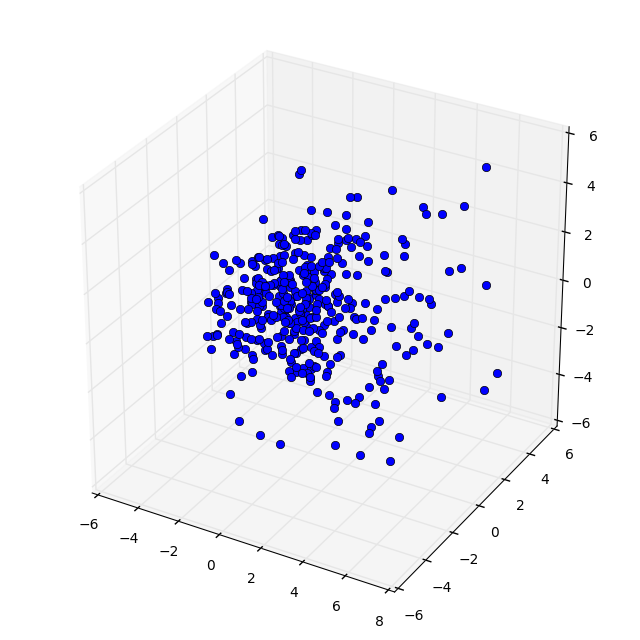

In [26]:
new_x = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,0], new_x[:,1], new_x[:,2], 'o')
plt.show()

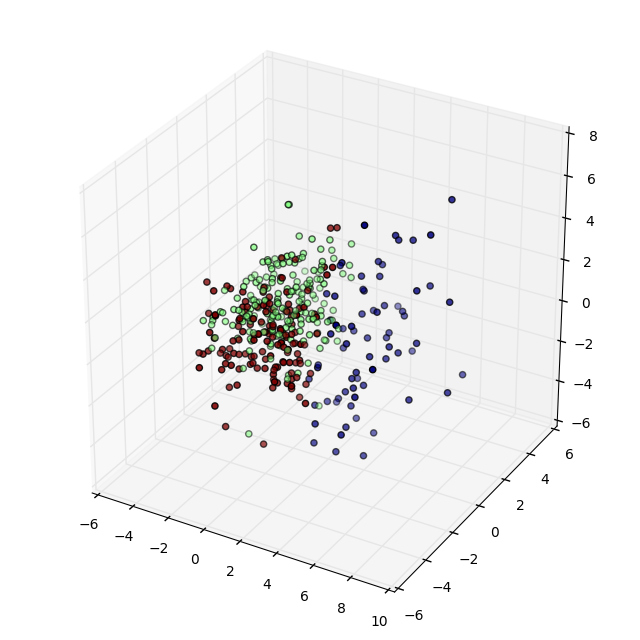

In [27]:
kmeans.fit(new_x)
labels = kmeans.labels_
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_x[:,0], new_x[:,1], new_x[:,2], 'o', c=labels.astype(np.float))
plt.show()

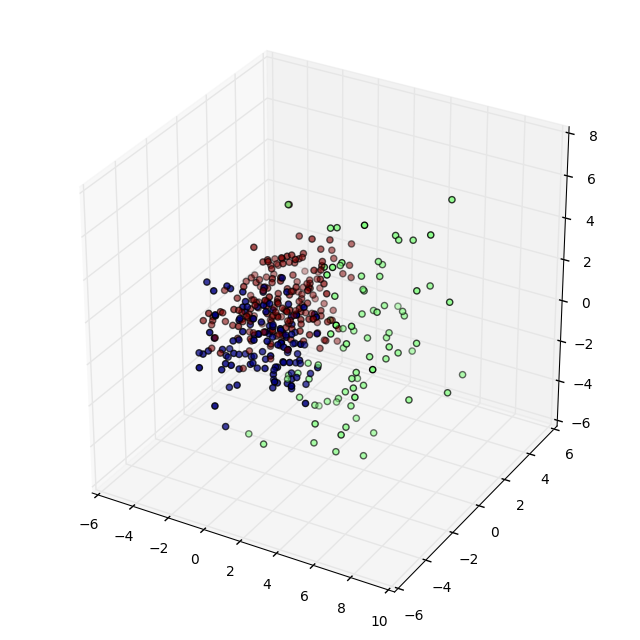

In [28]:
gmm = mixture.GaussianMixture(n_components = 3).fit(new_x)
labels = gmm.predict(new_x)
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_x[:,0], new_x[:,1], new_x[:,2], 'o', c=labels.astype(np.float))
plt.show()

In [29]:
labels_col = pd.DataFrame(data=labels, columns=['GMM_label2'])
data_frame_labeled = data_frame_categorical.join(labels_col)
clusters = data_frame_labeled.groupby('GMM_label2')
clusters = [clusters.get_group(z) for z in clusters.groups]

<h2>Questioning our assumptions</h2>
<p>
In the analysis above, we worked under 2 assumptions that we must now put to the test: the number of clusters that we expect to find is 3 and clustering in only 3 PCA components is enough to capture the complexity of the data. We'll test those assumptions in what's to come.
</p>

<h2>Finding the right number of clusters</h2>

In [30]:
# David's code

<h2>Finding the GMM model</h2>

In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

The BIC was developed by Gideon E. Schwarz and published in a 1978 paper,[1] where he gave a Bayesian argument for adopting it.

SOURCE: https://en.wikipedia.org/wiki/Bayesian_information_criterion

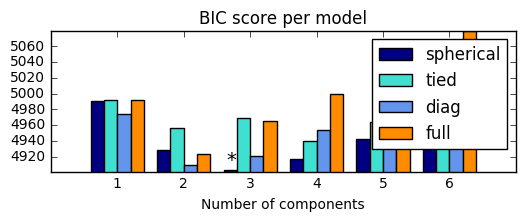

In [31]:
# ADAPTED FROM SKLEARN'S http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
import numpy as np
from scipy import linalg
import itertools

X = new_x

n_samples = rows
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

<h2>Testing the results of a spherical covariance GMM</h2>

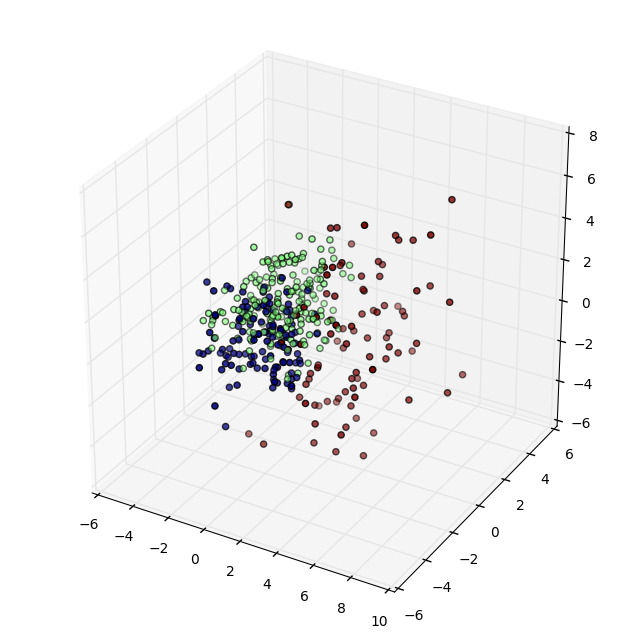

In [32]:
gmm = mixture.GaussianMixture(n_components = 3, covariance_type='spherical').fit(new_x)
labels = gmm.predict(new_x)
labels.astype(np.float)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new_x[:,0], new_x[:,1], new_x[:,2], 'o', c=labels.astype(np.float))
plt.show()

<h2>Checking that clustering in 3 dimensions is enough</h2>

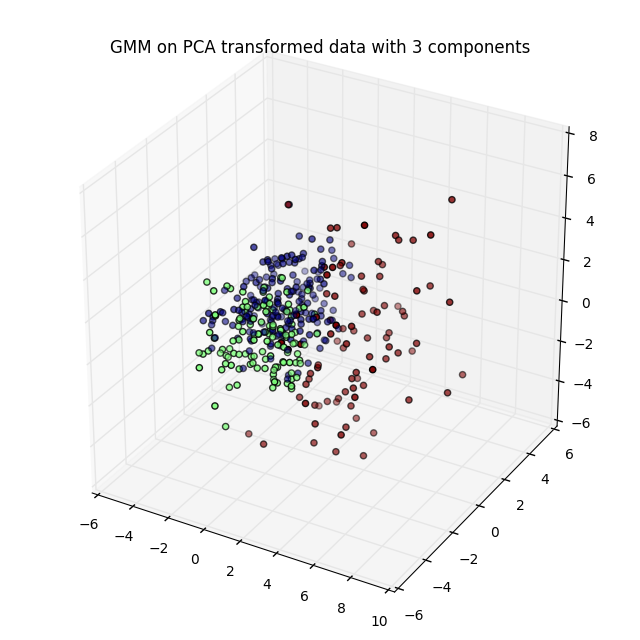

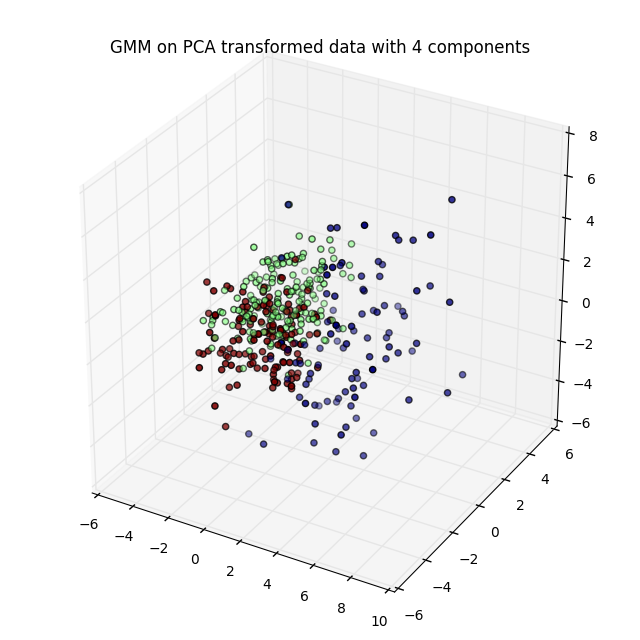

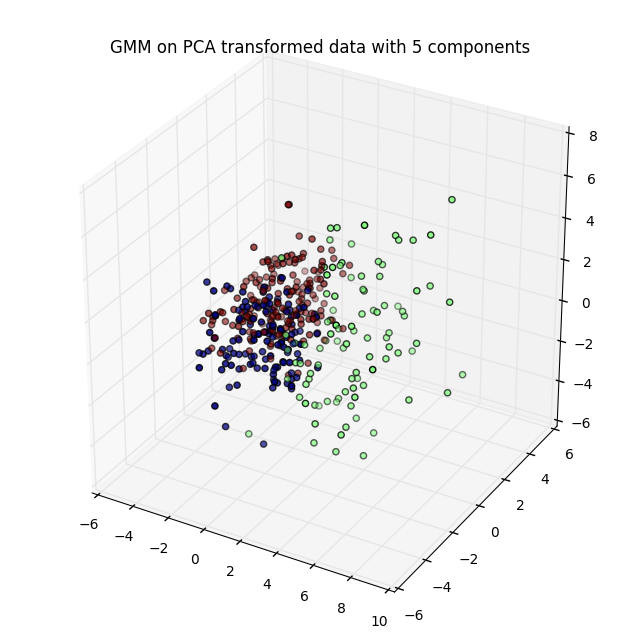

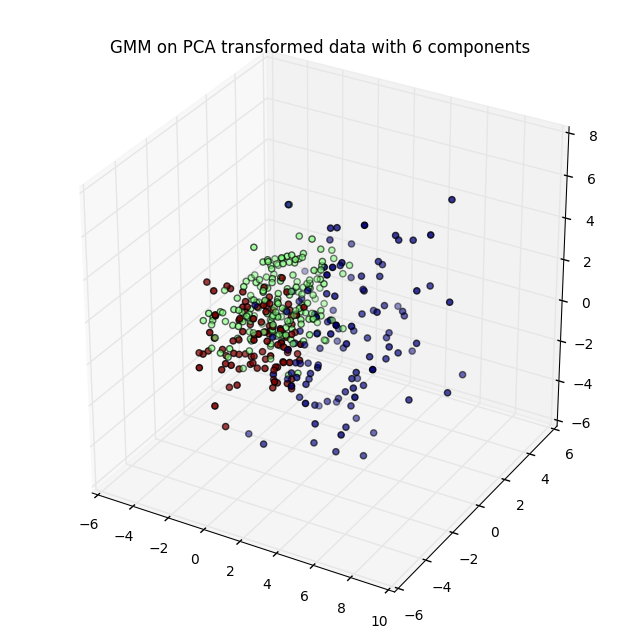

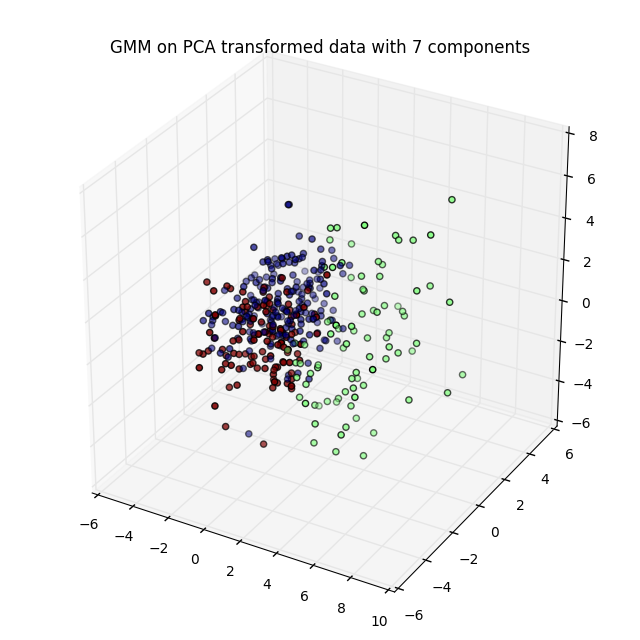

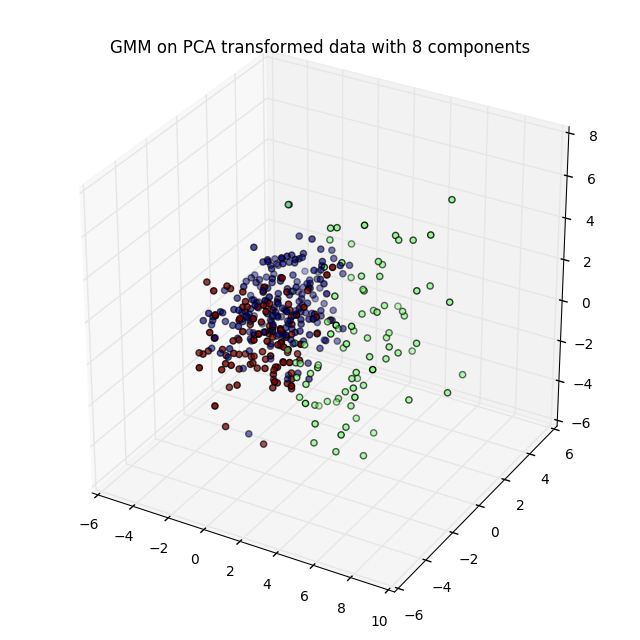

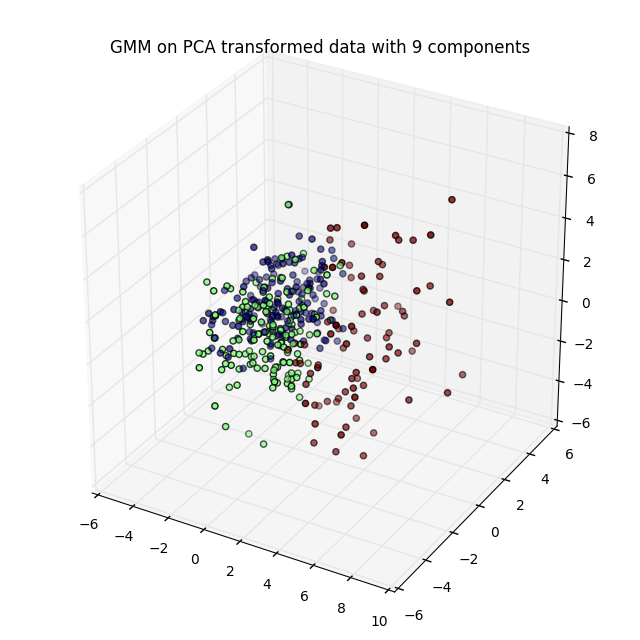

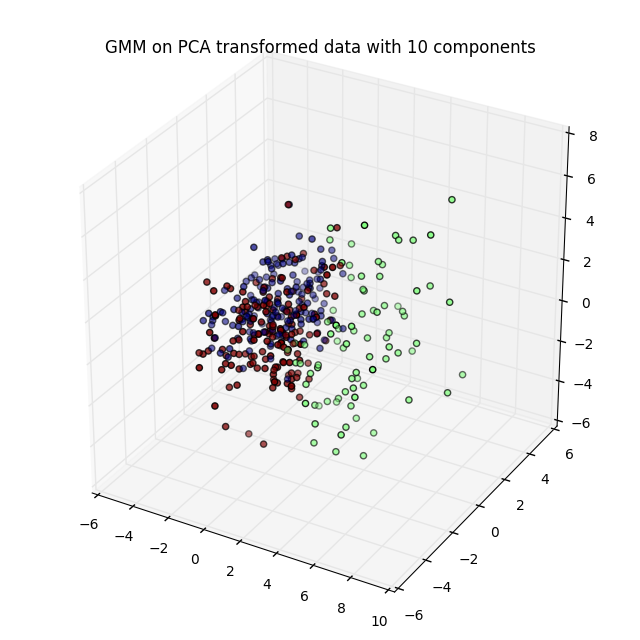

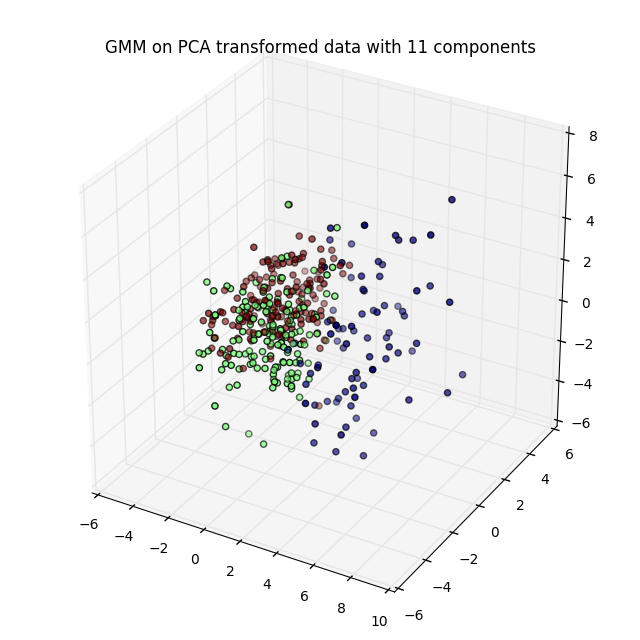

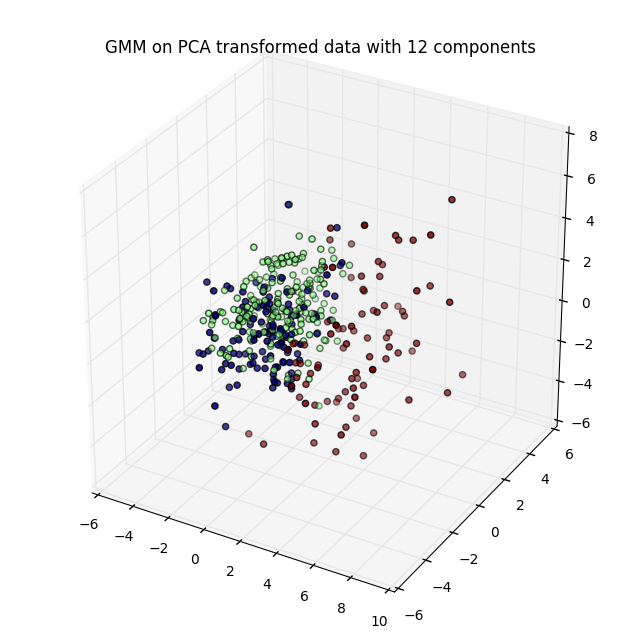

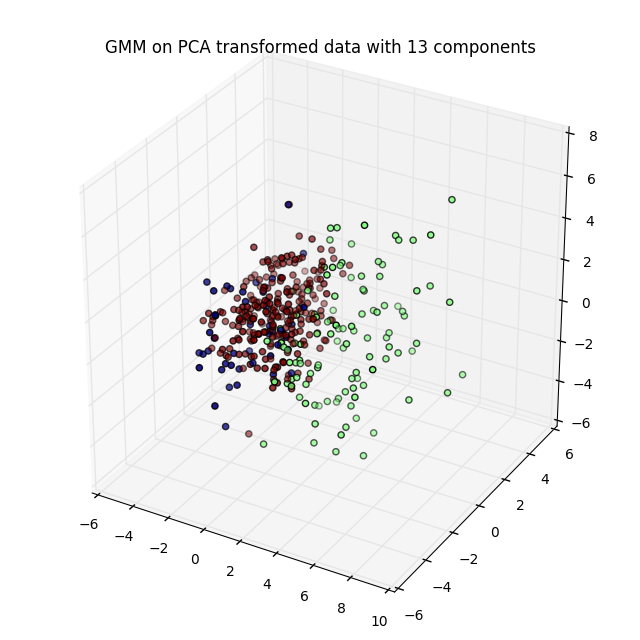

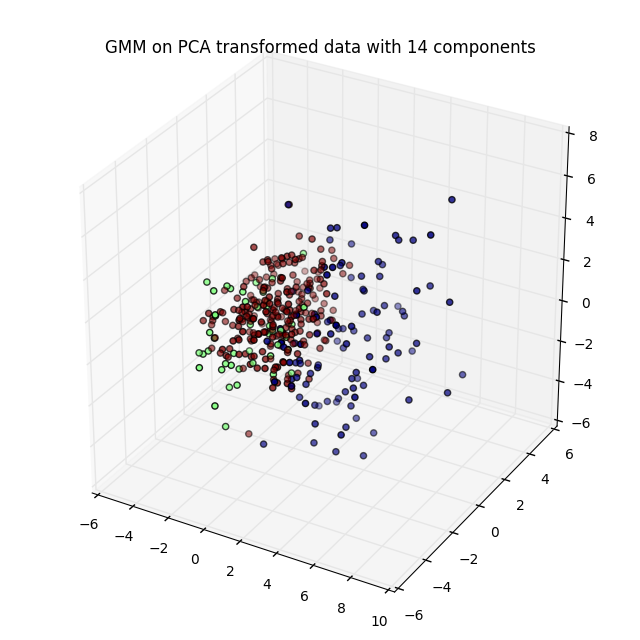

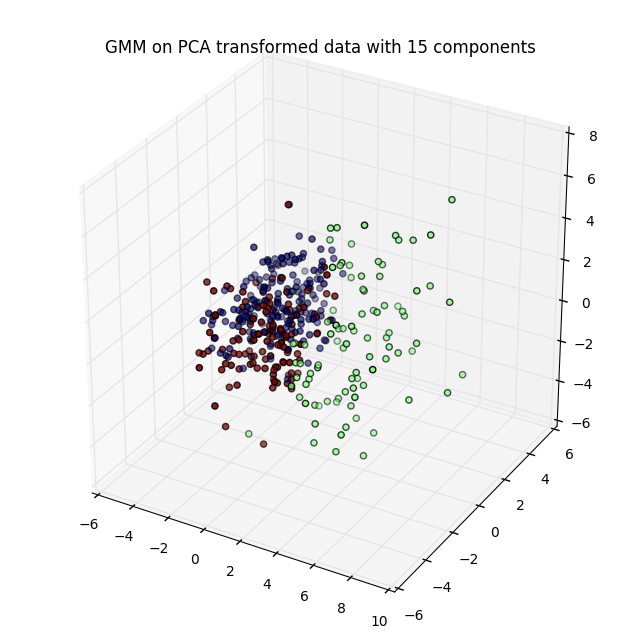

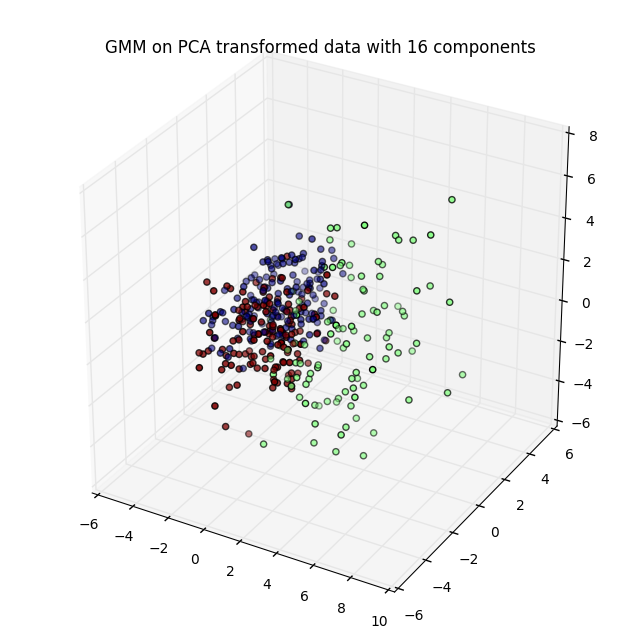

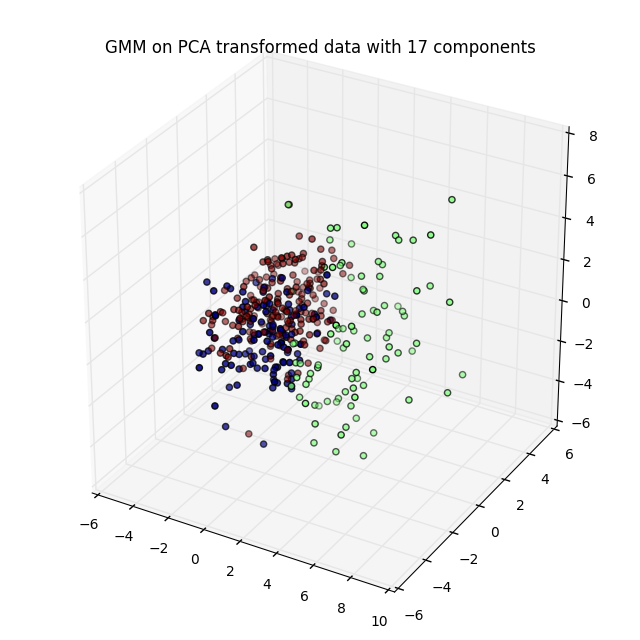

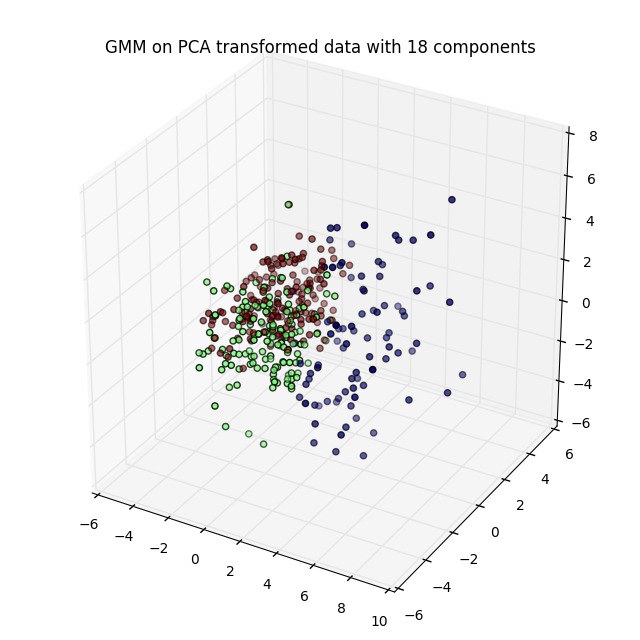

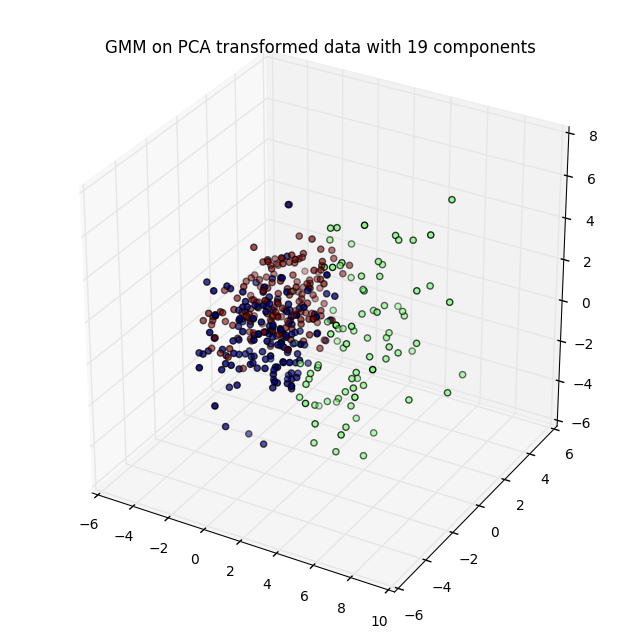

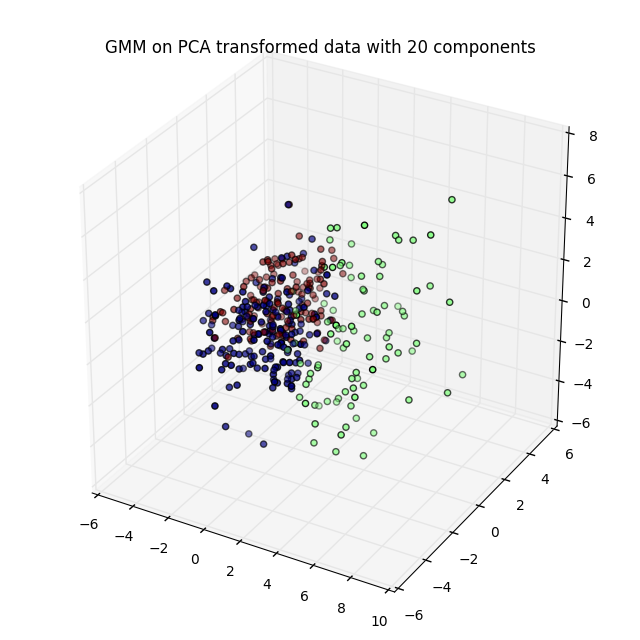

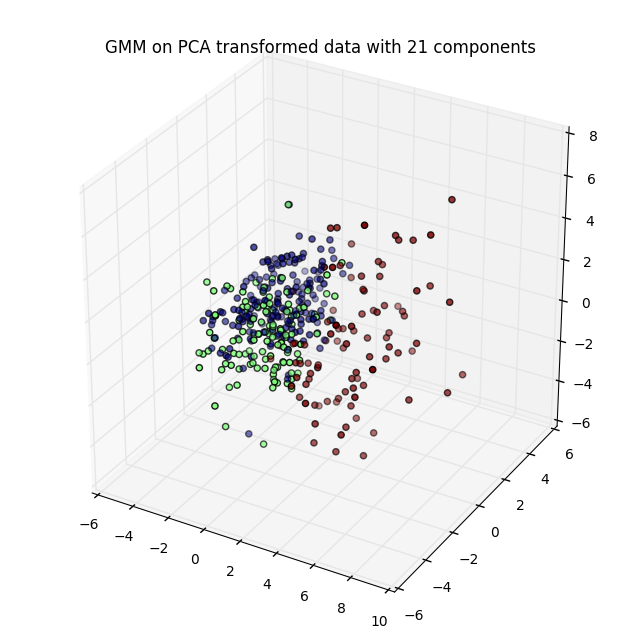

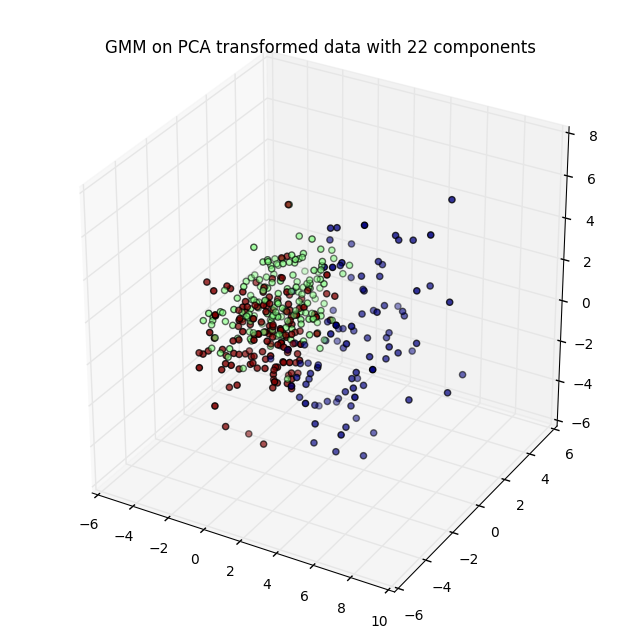

In [33]:
i=0
while i<20:
    plt.figure(1)
    dims = 3 + i
    pca = PCA(n_components=dims)
    x =  pca.fit_transform(normalized_categorical)
    gmm.fit(x)
    labels = gmm.predict(x)
    labels.astype(np.float)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x[:,0], x[:,1], x[:,2], 'o', c=labels.astype(np.float))
    title = 'GMM on PCA transformed data with %d components' %dims
    plt.title(title)
    i=i+1
    plt.show()

<h2>Exploring the clusters, right this time</h2>

In [34]:
#Append GMM labels to dataframe
labels_col = pd.DataFrame(data=labels, columns=['GMM_label2'])
data_frame_labeled = data_frame_categorical.join(labels_col)

# Split
clusters = data_frame_labeled.groupby('GMM_label2')
clusters = [clusters.get_group(z) for z in clusters.groups]

In [35]:
cluster0_summary = clusters[0].describe()
cluster0_summary

age       Medu       Fedu  traveltime  studytime   failures  \
count  94.000000  94.000000  94.000000   94.000000  94.000000  94.000000   
mean   17.617021   2.191489   2.042553    1.851064   1.702128   0.723404   
std     1.262413   1.147944   1.046396    0.903487   0.745305   1.020270   
min    15.000000   0.000000   1.000000    1.000000   1.000000   0.000000   
25%    17.000000   1.000000   1.000000    1.000000   1.000000   0.000000   
50%    18.000000   2.000000   2.000000    2.000000   2.000000   0.000000   
75%    18.000000   3.000000   3.000000    2.000000   2.000000   1.000000   
max    22.000000   4.000000   4.000000    4.000000   4.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  94.000000  94.000000  94.000000  94.000000  94.000000  94.000000   
mean    3.861702   3.468085   3.255319   1.861702   2.787234   3.702128   
std     0.979369   1.170444   1.252406   1.093491   1.413243   1.342681   
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     3.000000   3.000000   2.000000   1.000000   1.250000   3.000000   
50%     4.000000   4.000000   3.000000   1.500000   3.000000   4.000000   
75%     5.000000   4.000000   4.000000   2.000000   4.000000   5.000000   
max     5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   

        absences         G1         G2         G3  school_GP  school_MS  \
count  94.000000  94.000000  94.000000  94.000000  94.000000  94.000000   
mean    5.648936  10.202128   9.308511   8.765957   0.563830   0.436170   
std    10.005060   3.393795   3.877219   4.860253   0.498568   0.498568   
min     0.000000   5.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   7.000000   7.250000   7.000000   0.000000   0.000000   
50%     2.000000  10.000000   9.000000  10.000000   1.000000   0.000000   
75%     6.750000  13.000000  12.000000  12.000000   1.000000   1.000000   
max    75.000000  19.000000  18.000000  19.000000   1.000000   1.000000   

           sex_F      sex_M  address_R  address_U  famsize_GT3  famsize_LE3  \
count  94.000000  94.000000  94.000000  94.000000    94.000000    94.000000   
mean    0.393617   0.606383   0.489362   0.510638     0.659574     0.340426   
std     0.491171   0.491171   0.502567   0.502567     0.476393     0.476393   
min     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
25%     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
50%     0.000000   1.000000   0.000000   1.000000     1.000000     0.000000   
75%     1.000000   1.000000   1.000000   1.000000     1.000000     1.000000   
max     1.000000   1.000000   1.000000   1.000000     1.000000     1.000000   

       Pstatus_A  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
count  94.000000  94.000000     94.000000    94.000000   94.000000   
mean    0.117021   0.882979      0.276596     0.031915    0.361702   
std     0.323169   0.323169      0.449713     0.176716    0.483070   
min     0.000000   0.000000      0.000000     0.000000    0.000000   
25%     0.000000   1.000000      0.000000     0.000000    0.000000   
50%     0.000000   1.000000      0.000000     0.000000    0.000000   
75%     0.000000   1.000000      1.000000     0.000000    1.000000   
max     1.000000   1.000000      1.000000     1.000000    1.000000   

       Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
count      94.000000     94.000000     94.000000    94.000000   94.000000   
mean        0.244681      0.085106      0.095745     0.031915    0.489362   
std         0.432203      0.280536      0.295818     0.176716    0.502567   
min         0.000000      0.000000      0.000000     0.000000    0.000000   
25%         0.000000      0.000000      0.000000     0.000000    0.000000   
50%         0.000000      0.000000      0.000000     0.000000    0.000000   
75%         0.000000      0.000000      0.000000     0.000000    1.000000   
max         1.000

In [36]:
data_stds = pd.Series.to_frame(cluster0_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [37]:
cluster1_summary = clusters[1].describe()
cluster1_summary

age        Medu        Fedu  traveltime   studytime    failures  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    16.367089    3.303797    2.898734    1.278481    2.082278    0.056962   
std      1.096343    0.921843    1.004384    0.503155    0.859308    0.258454   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     15.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
50%     16.000000    4.000000    3.000000    1.000000    2.000000    0.000000   
75%     17.000000    4.000000    4.000000    1.750000    2.000000    0.000000   
max     19.000000    4.000000    4.000000    3.000000    4.000000    2.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     4.063291    3.316456    3.088608    1.436709    2.246835    3.506329   
std      0.842226    0.971496    1.030613    0.884643    1.245050    1.457451   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3   school_GP   school_MS  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     4.696203   12.981013   13.120253   13.284810    0.981013    0.018987   
std      5.049701    2.723971    2.746990    3.011849    0.136914    0.136914   
min      0.000000    6.000000    7.000000    0.000000    0.000000    0.000000   
25%      0.000000   11.000000   11.000000   11.000000    1.000000    0.000000   
50%      4.000000   13.000000   13.000000   14.000000    1.000000    0.000000   
75%      7.750000   15.000000   15.000000   15.000000    1.000000    0.000000   
max     24.000000   19.000000   19.000000   20.000000    1.000000    1.000000   

            sex_F       sex_M   address_R   address_U  famsize_GT3  \
count  158.000000  158.000000  158.000000  158.000000   158.000000   
mean     0.310127    0.689873    0.082278    0.917722     0.715190   
std      0.464016    0.464016    0.275662    0.275662     0.452759   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    1.000000     0.000000   
50%      0.000000    1.000000    0.000000    1.000000     1.000000   
75%      1.000000    1.000000    0.000000    1.000000     1.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       famsize_LE3   Pstatus_A   Pstatus_T  Mjob_at_home  Mjob_health  \
count   158.000000  158.000000  158.000000    158.000000   158.000000   
mean      0.284810    0.069620    0.930380      0.012658     0.158228   
std       0.452759    0.255315    0.255315      0.112150     0.366115   
min       0.000000    0.000000    0.000000      0.000000     0.000000   
25%       0.000000    0.000000    1.000000      0.000000     0.000000   
50%       0.000000    0.000000    1.000000      0.000000     0.000000   
75%       1.000000    0.000000    1.000000      0.000000     0.000000   
max       1.000000    1.000000    1.000000      1.000000     1.000000   

       Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
count  158.000000     158.000000    158.000000    158.000000   158.000000   
mean     0.278481       0.265823      0.284810      0.018987     0.044304   
std      0.449677       0.443175      0.452759      0.136914     0.206423   
min      0.000000       0.000000      0.000000      0.000000     0.000000   
25%      0.000000       0.000000      0.000000      0.000000     0.000000   
50%      0.000000       0.000000      0.000000      0.000000     0.000000

In [38]:
data_stds = pd.Series.to_frame(cluster1_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [39]:
cluster2_summary = clusters[2].describe()
cluster2_summary

age        Medu        Fedu  traveltime   studytime    failures  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean    16.454545    2.503497    2.419580    1.370629    2.202797    0.384615   
std      1.185162    0.955887    1.064223    0.624368    0.818444    0.768418   
min     15.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%     15.000000    2.000000    1.500000    1.000000    2.000000    0.000000   
50%     16.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     17.000000    3.000000    3.000000    2.000000    3.000000    0.000000   
max     19.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     3.867133    2.993007    3.034965    1.279720    2.013986    3.510490   
std      0.889989    0.851647    1.103213    0.643555    1.156647    1.347231   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      4.000000    4.000000    4.000000    1.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3   school_GP   school_MS  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     6.867133    9.083916    8.979021    8.328671    0.986014    0.013986   
std      9.025970    2.521727    3.207536    4.170277    0.117845    0.117845   
min      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    7.000000    7.000000    6.000000    1.000000    0.000000   
50%      4.000000    9.000000    9.000000    9.000000    1.000000    0.000000   
75%     10.000000   11.000000   11.000000   11.000000    1.000000    0.000000   
max     56.000000   18.000000   18.000000   18.000000    1.000000    1.000000   

            sex_F       sex_M   address_R   address_U  famsize_GT3  \
count  143.000000  143.000000  143.000000  143.000000   143.000000   
mean     0.853147    0.146853    0.202797    0.797203     0.741259   
std      0.355204    0.355204    0.403496    0.403496     0.439483   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.000000    0.000000    0.000000    1.000000     0.000000   
50%      1.000000    0.000000    0.000000    1.000000     1.000000   
75%      1.000000    0.000000    0.000000    1.000000     1.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       famsize_LE3   Pstatus_A   Pstatus_T  Mjob_at_home  Mjob_health  \
count   143.000000  143.000000  143.000000    143.000000   143.000000   
mean      0.258741    0.132867    0.867133      0.216783     0.041958   
std       0.439483    0.340624    0.340624      0.413502     0.201198   
min       0.000000    0.000000    0.000000      0.000000     0.000000   
25%       0.000000    0.000000    1.000000      0.000000     0.000000   
50%       0.000000    0.000000    1.000000      0.000000     0.000000   
75%       1.000000    0.000000    1.000000      0.000000     0.000000   
max       1.000000    1.000000    1.000000      1.000000     1.000000   

       Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
count  143.000000     143.000000    143.000000    143.000000   143.000000   
mean     0.440559       0.265734      0.034965      0.055944     0.055944   
std      0.498199       0.443276      0.184337      0.230621     0.230621   
min      0.000000       0.000000      0.000000      0.000000     0.000000   
25%      0.000000       0.000000      0.000000      0.000000     0.000000   
50%      0.000000       0.000000      0.000000      0.000000     0.000000

In [40]:
data_stds = pd.Series.to_frame(cluster2_summary.loc['std'])
data_stds = data_stds.sort_values(by='std', ascending=False)

bar_plot = Bar(data_stds, values='std', label=cat(columns=None, sort=False), legend=False)
show(bar_plot)

In [41]:
cluster2_summary = clusters[2].describe()
cluster2_summary

age        Medu        Fedu  traveltime   studytime    failures  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean    16.454545    2.503497    2.419580    1.370629    2.202797    0.384615   
std      1.185162    0.955887    1.064223    0.624368    0.818444    0.768418   
min     15.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%     15.000000    2.000000    1.500000    1.000000    2.000000    0.000000   
50%     16.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     17.000000    3.000000    3.000000    2.000000    3.000000    0.000000   
max     19.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     3.867133    2.993007    3.034965    1.279720    2.013986    3.510490   
std      0.889989    0.851647    1.103213    0.643555    1.156647    1.347231   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      4.000000    4.000000    4.000000    1.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3   school_GP   school_MS  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     6.867133    9.083916    8.979021    8.328671    0.986014    0.013986   
std      9.025970    2.521727    3.207536    4.170277    0.117845    0.117845   
min      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    7.000000    7.000000    6.000000    1.000000    0.000000   
50%      4.000000    9.000000    9.000000    9.000000    1.000000    0.000000   
75%     10.000000   11.000000   11.000000   11.000000    1.000000    0.000000   
max     56.000000   18.000000   18.000000   18.000000    1.000000    1.000000   

            sex_F       sex_M   address_R   address_U  famsize_GT3  \
count  143.000000  143.000000  143.000000  143.000000   143.000000   
mean     0.853147    0.146853    0.202797    0.797203     0.741259   
std      0.355204    0.355204    0.403496    0.403496     0.439483   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.000000    0.000000    0.000000    1.000000     0.000000   
50%      1.000000    0.000000    0.000000    1.000000     1.000000   
75%      1.000000    0.000000    0.000000    1.000000     1.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       famsize_LE3   Pstatus_A   Pstatus_T  Mjob_at_home  Mjob_health  \
count   143.000000  143.000000  143.000000    143.000000   143.000000   
mean      0.258741    0.132867    0.867133      0.216783     0.041958   
std       0.439483    0.340624    0.340624      0.413502     0.201198   
min       0.000000    0.000000    0.000000      0.000000     0.000000   
25%       0.000000    0.000000    1.000000      0.000000     0.000000   
50%       0.000000    0.000000    1.000000      0.000000     0.000000   
75%       1.000000    0.000000    1.000000      0.000000     0.000000   
max       1.000000    1.000000    1.000000      1.000000     1.000000   

       Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
count  143.000000     143.000000    143.000000    143.000000   143.000000   
mean     0.440559       0.265734      0.034965      0.055944     0.055944   
std      0.498199       0.443276      0.184337      0.230621     0.230621   
min      0.000000       0.000000      0.000000      0.000000     0.000000   
25%      0.000000       0.000000      0.000000      0.000000     0.000000   
50%      0.000000       0.000000      0.000000      0.000000     0.000000

#pca = PCA(n_components=33)
#x = pca.fit(data_frame_categorical).transform(data_frame_categorical)
#pca.explained_variance_

'''
After looking at the variance of all 33 features, we found that the first 20
principal components were still of high variance, so we decided to visualize
our data with these PCs:
5.05712902  3.54332991  3.01096375  2.83703832  2.70843984  2.60435435
  2.40652638  2.19930084  2.08764893  2.03035868  1.83944508  1.78271164
  1.73894819  1.65489692  1.57964258  1.468433    1.43992682  1.35604034
1.29107201  1.2462993
'''

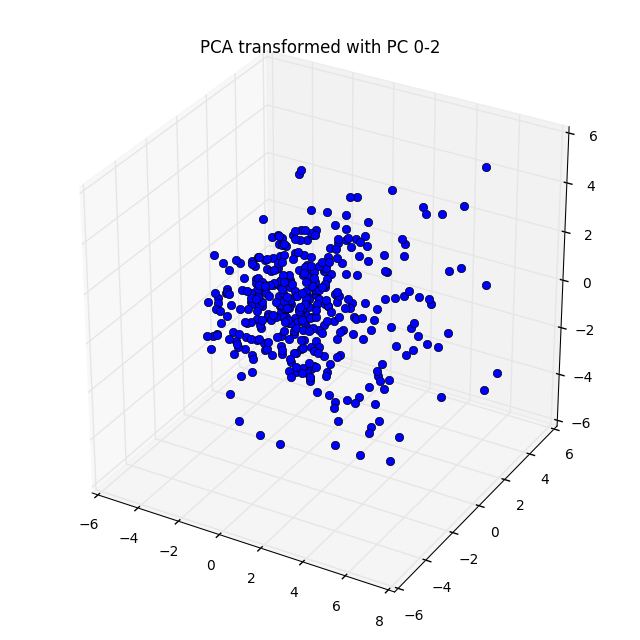

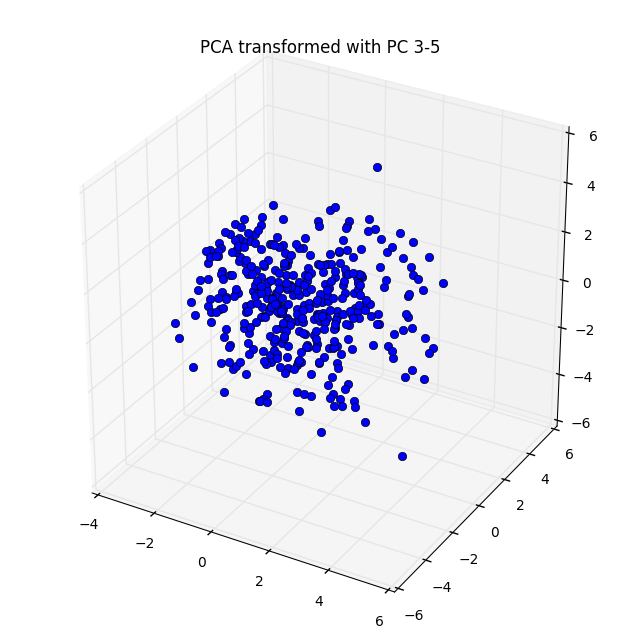

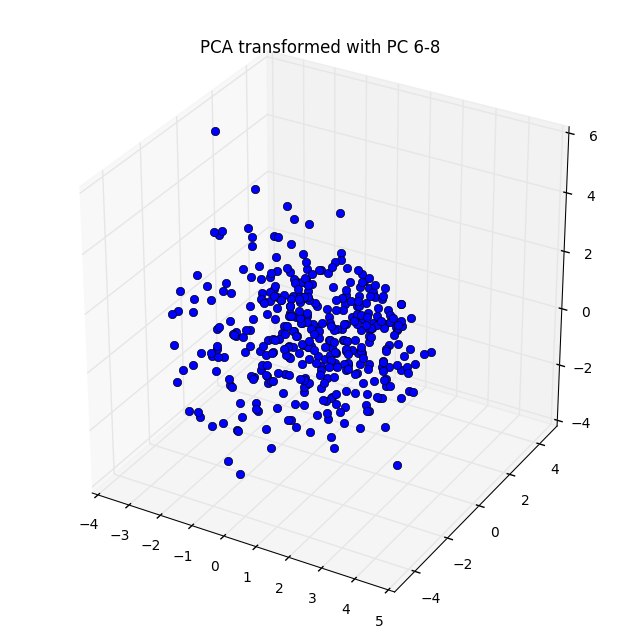

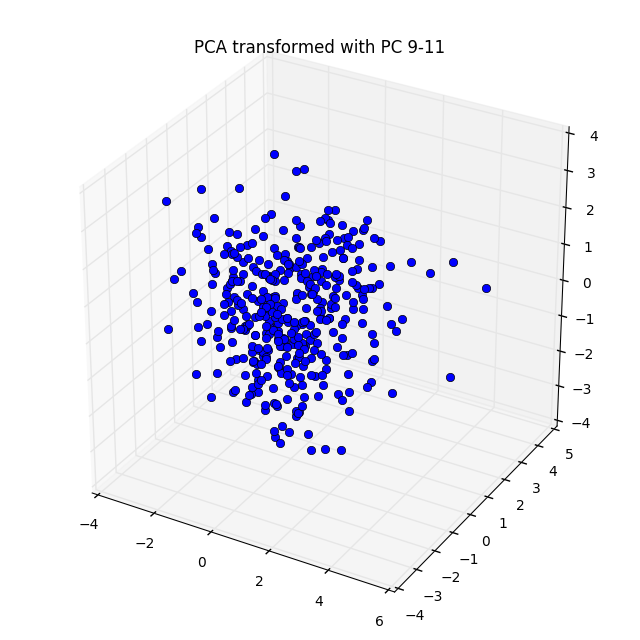

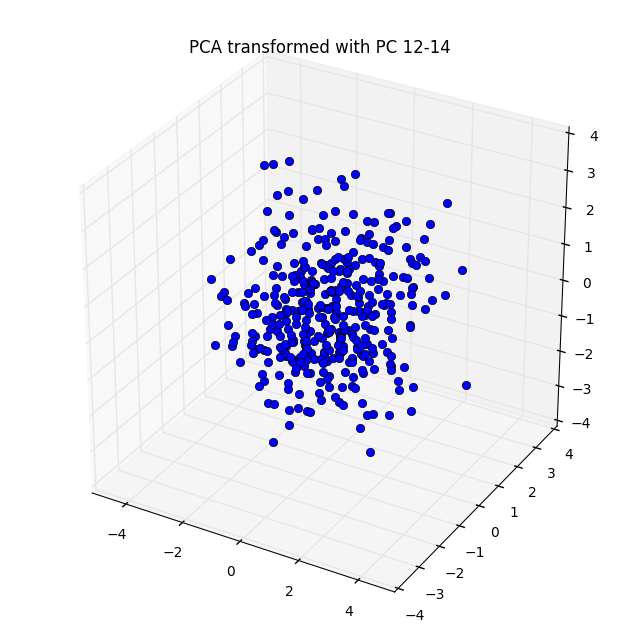

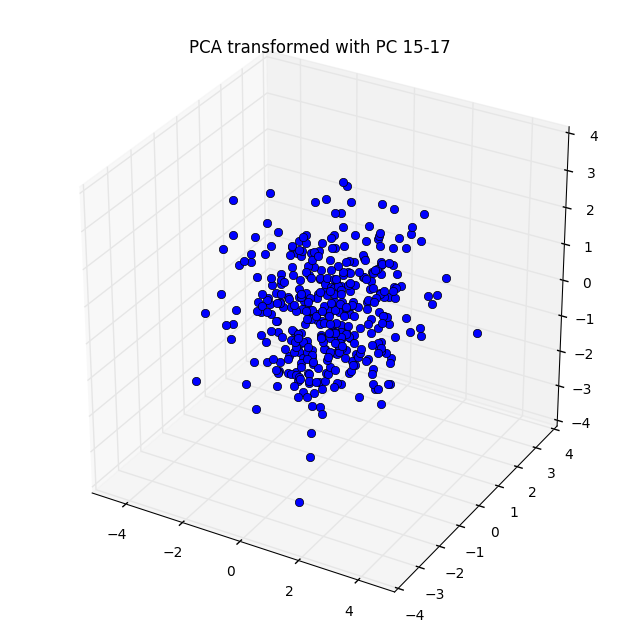

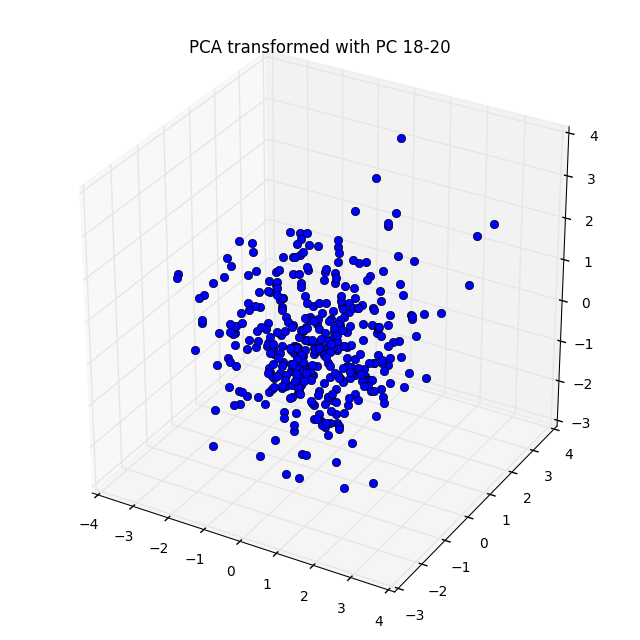

In [43]:
new_x = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,0], new_x[:,1], new_x[:,2], 'o')
plt.title('PCA transformed with PC 0-2')

new_x2 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,3], new_x[:,4], new_x[:,5], 'o')
plt.title('PCA transformed with PC 3-5')

new_x3 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,6], new_x[:,7], new_x[:,8], 'o')
plt.title('PCA transformed with PC 6-8')

new_x4 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,9], new_x[:,10], new_x[:,11], 'o')
plt.title('PCA transformed with PC 9-11')

new_x5 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,12], new_x[:,13], new_x[:,14], 'o')
plt.title('PCA transformed with PC 12-14')

new_x6 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,15], new_x[:,16], new_x[:,17], 'o')
plt.title('PCA transformed with PC 15-17')

new_x7 = pca.fit_transform(normalized_categorical)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(new_x[:,18], new_x[:,19], new_x[:,20], 'o')
plt.title('PCA transformed with PC 18-20')

# show plots
plt.show()